In [1]:
from jupyterthemes import jtplot
from tensorflow import set_random_seed
set_random_seed(42)
jtplot.style()
# Constantes
SEED = 42
m = 64
tau = 1
delta = 2

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from matplotlib import pyplot as plt
from tensorflow.keras import layers
from keras import regularizers
from tensorflow import keras
import numpy as np
import pandas as pd

Using TensorFlow backend.


In [3]:
from Funciones import GenersConjuntos
from Funciones import plot_history

In [4]:
def ModMLP(show=True): # Modelo de la red neuronal a utilizar
    inputs = keras.Input(shape=(m))
    x = layers.Dense(64, activation='sigmoid')(inputs)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(256, activation='relu')(x)
    outputs = layers.Dense(delta, activation='linear')(x)

    model = keras.Model(inputs=inputs, outputs=outputs, name='forecasting')
    
    if(show):
        model.summary()
    
    return model

<h3> Lectura y analisis de la serie de tiempo </h3>

Para comenzar se lee la serie de tiempo desde el archivo csv

In [5]:
TS = pd.read_csv('TimesSeries\Electric_Production.csv')

In [6]:
TS.info() # Se reviza que la serie de tiempo no tenga nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
DATE     397 non-null object
Value    397 non-null float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


La serie de tiempo es tomada desde la columna value

In [7]:
serie = TS.Value

Se pueden revizar su media, su maximo, su minimo, y su promedio

In [8]:
print('Media:', serie.mean())
print('Maximo:', serie.max())
print('Minimo:', serie.min())
print('STD:', serie.std())

Media: 88.84721763224182
Maximo: 129.4048
Minimo: 55.3151
STD: 15.387833664730902


La serie es convertiza a numpy array para un mejor manejo, a su vez es ploteada para observar su forma

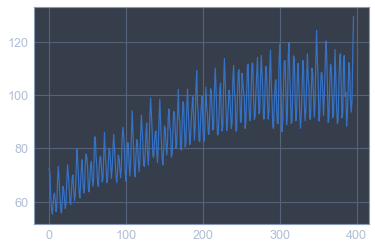

In [9]:
serie = np.array(serie)
plt.plot(serie)
plt.show()

Posteriormente se estandariza la serie y se obtienen los conjuntos de datos con los cuales se ha de entrenar la red

In [10]:
X_train, X_val, X_test, y_train, y_val, y_test=  GenersConjuntos(serie, 0.3, 0.2)

In [11]:
X_val.shape

(47, 64)

<h3> Diseño y entrenamiento de la red neuronal </h3>

In [23]:
model = ModMLP()

Model: "forecasting"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64)]              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 514       
Total params: 46,018
Trainable params: 46,018
Non-trainable params: 0
_________________________________________________________________


Una vez que el modelo esta creado se compila y se entrena.

En la compilación se utiliza como funcion de perdida el Error cuadratico medio en convinacion con el gradiente estocastico, el tercer parametro son las metricas en este caso se utilizan el error absoluto medio, el error cuadratico medio y accuracy, aunque la ultima no es una buena referencia cuando se realiza prediccion de series de tiempo (forcasting) es más comun su utilización en clasificación.

In [24]:
model.compile(loss="mean_squared_error", optimizer="sgd", metrics=['mae', 'mse','accuracy'])

In [25]:
callback = EarlyStopping(monitor='val_loss', patience=19, restore_best_weights=True)
history = model.fit(X_train, y_train,
                    batch_size=64,
                    callbacks=[callback],
                    epochs=2000,
                    validation_data=(X_val, y_val))

test_scores = model.evaluate(X_test, y_test, batch_size=32)
print('Test loss:', test_scores[0])
print('Test mae:', test_scores[1])
print('Test mse:', test_scores[2])
print('Test acc:', test_scores[3])

Train on 185 samples, validate on 47 samples
Epoch 1/2000
185/185 [==============================] - 0s 779us/sample - loss: 0.8991 - mean_absolute_error: 0.7730 - mean_squared_error: 0.8991 - acc: 0.5243 - val_loss: 0.6265 - val_mean_absolute_error: 0.6470 - val_mean_squared_error: 0.6265 - val_acc: 0.5957
Epoch 2/2000
185/185 [==============================] - 0s 113us/sample - loss: 0.7204 - mean_absolute_error: 0.6825 - mean_squared_error: 0.7204 - acc: 0.7243 - val_loss: 0.5369 - val_mean_absolute_error: 0.5943 - val_mean_squared_error: 0.5369 - val_acc: 0.7447
Epoch 3/2000
185/185 [==============================] - 0s 119us/sample - loss: 0.6474 - mean_absolute_error: 0.6538 - mean_squared_error: 0.6474 - acc: 0.7838 - val_loss: 0.4880 - val_mean_absolute_error: 0.5649 - val_mean_squared_error: 0.4880 - val_acc: 0.7021
Epoch 4/2000
185/185 [==============================] - 0s 108us/sample - loss: 0.5978 - mean_absolute_error: 0.6316 - mean_squared_error: 0.5978 - acc: 0.7405 - v

Epoch 32/2000
185/185 [==============================] - 0s 138us/sample - loss: 0.1464 - mean_absolute_error: 0.3080 - mean_squared_error: 0.1464 - acc: 0.8378 - val_loss: 0.0927 - val_mean_absolute_error: 0.2428 - val_mean_squared_error: 0.0927 - val_acc: 0.7660
Epoch 33/2000
185/185 [==============================] - 0s 139us/sample - loss: 0.1415 - mean_absolute_error: 0.3040 - mean_squared_error: 0.1415 - acc: 0.8432 - val_loss: 0.0894 - val_mean_absolute_error: 0.2390 - val_mean_squared_error: 0.0894 - val_acc: 0.8085
Epoch 34/2000
185/185 [==============================] - 0s 125us/sample - loss: 0.1374 - mean_absolute_error: 0.2988 - mean_squared_error: 0.1374 - acc: 0.8432 - val_loss: 0.0863 - val_mean_absolute_error: 0.2352 - val_mean_squared_error: 0.0863 - val_acc: 0.7872
Epoch 35/2000
185/185 [==============================] - 0s 121us/sample - loss: 0.1335 - mean_absolute_error: 0.2940 - mean_squared_error: 0.1335 - acc: 0.8432 - val_loss: 0.0830 - val_mean_absolute_error

Epoch 63/2000
185/185 [==============================] - 0s 129us/sample - loss: 0.0710 - mean_absolute_error: 0.2125 - mean_squared_error: 0.0710 - acc: 0.8919 - val_loss: 0.0429 - val_mean_absolute_error: 0.1633 - val_mean_squared_error: 0.0429 - val_acc: 0.7872
Epoch 64/2000
185/185 [==============================] - 0s 129us/sample - loss: 0.0699 - mean_absolute_error: 0.2122 - mean_squared_error: 0.0699 - acc: 0.8703 - val_loss: 0.0425 - val_mean_absolute_error: 0.1620 - val_mean_squared_error: 0.0425 - val_acc: 0.8298
Epoch 65/2000
185/185 [==============================] - 0s 158us/sample - loss: 0.0691 - mean_absolute_error: 0.2093 - mean_squared_error: 0.0691 - acc: 0.8811 - val_loss: 0.0421 - val_mean_absolute_error: 0.1633 - val_mean_squared_error: 0.0421 - val_acc: 0.8298
Epoch 66/2000
185/185 [==============================] - 0s 164us/sample - loss: 0.0680 - mean_absolute_error: 0.2097 - mean_squared_error: 0.0680 - acc: 0.9081 - val_loss: 0.0419 - val_mean_absolute_error

185/185 [==============================] - 0s 108us/sample - loss: 0.0547 - mean_absolute_error: 0.1848 - mean_squared_error: 0.0547 - acc: 0.8973 - val_loss: 0.0395 - val_mean_absolute_error: 0.1546 - val_mean_squared_error: 0.0395 - val_acc: 0.8723
Epoch 94/2000
185/185 [==============================] - 0s 113us/sample - loss: 0.0546 - mean_absolute_error: 0.1839 - mean_squared_error: 0.0546 - acc: 0.8973 - val_loss: 0.0394 - val_mean_absolute_error: 0.1546 - val_mean_squared_error: 0.0394 - val_acc: 0.8723
Epoch 95/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0544 - mean_absolute_error: 0.1850 - mean_squared_error: 0.0544 - acc: 0.8919 - val_loss: 0.0396 - val_mean_absolute_error: 0.1544 - val_mean_squared_error: 0.0396 - val_acc: 0.8936
Epoch 96/2000
185/185 [==============================] - 0s 105us/sample - loss: 0.0541 - mean_absolute_error: 0.1828 - mean_squared_error: 0.0541 - acc: 0.8919 - val_loss: 0.0396 - val_mean_absolute_error: 0.1547 - val_

185/185 [==============================] - 0s 108us/sample - loss: 0.0497 - mean_absolute_error: 0.1746 - mean_squared_error: 0.0497 - acc: 0.9027 - val_loss: 0.0393 - val_mean_absolute_error: 0.1536 - val_mean_squared_error: 0.0393 - val_acc: 0.8936
Epoch 124/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0496 - mean_absolute_error: 0.1745 - mean_squared_error: 0.0496 - acc: 0.8973 - val_loss: 0.0395 - val_mean_absolute_error: 0.1542 - val_mean_squared_error: 0.0395 - val_acc: 0.8936
Epoch 125/2000
185/185 [==============================] - 0s 108us/sample - loss: 0.0496 - mean_absolute_error: 0.1755 - mean_squared_error: 0.0496 - acc: 0.8973 - val_loss: 0.0392 - val_mean_absolute_error: 0.1528 - val_mean_squared_error: 0.0392 - val_acc: 0.8936
Epoch 126/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0494 - mean_absolute_error: 0.1732 - mean_squared_error: 0.0494 - acc: 0.8973 - val_loss: 0.0402 - val_mean_absolute_error: 0.1561 - v

Epoch 154/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0464 - mean_absolute_error: 0.1680 - mean_squared_error: 0.0464 - acc: 0.9027 - val_loss: 0.0386 - val_mean_absolute_error: 0.1500 - val_mean_squared_error: 0.0386 - val_acc: 0.8936
Epoch 155/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0462 - mean_absolute_error: 0.1690 - mean_squared_error: 0.0462 - acc: 0.9081 - val_loss: 0.0382 - val_mean_absolute_error: 0.1487 - val_mean_squared_error: 0.0382 - val_acc: 0.8936
Epoch 156/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0467 - mean_absolute_error: 0.1692 - mean_squared_error: 0.0467 - acc: 0.9027 - val_loss: 0.0383 - val_mean_absolute_error: 0.1487 - val_mean_squared_error: 0.0383 - val_acc: 0.8936
Epoch 157/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0460 - mean_absolute_error: 0.1664 - mean_squared_error: 0.0460 - acc: 0.9081 - val_loss: 0.0385 - val_mean_absolute_err

Epoch 185/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0446 - mean_absolute_error: 0.1636 - mean_squared_error: 0.0446 - acc: 0.9027 - val_loss: 0.0369 - val_mean_absolute_error: 0.1445 - val_mean_squared_error: 0.0369 - val_acc: 0.8936
Epoch 186/2000
185/185 [==============================] - 0s 105us/sample - loss: 0.0441 - mean_absolute_error: 0.1636 - mean_squared_error: 0.0441 - acc: 0.9027 - val_loss: 0.0371 - val_mean_absolute_error: 0.1448 - val_mean_squared_error: 0.0371 - val_acc: 0.9149
Epoch 187/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0438 - mean_absolute_error: 0.1622 - mean_squared_error: 0.0438 - acc: 0.9081 - val_loss: 0.0371 - val_mean_absolute_error: 0.1446 - val_mean_squared_error: 0.0371 - val_acc: 0.9149
Epoch 188/2000
185/185 [==============================] - 0s 119us/sample - loss: 0.0437 - mean_absolute_error: 0.1618 - mean_squared_error: 0.0437 - acc: 0.9027 - val_loss: 0.0368 - val_mean_absolute_er

Epoch 216/2000
185/185 [==============================] - 0s 108us/sample - loss: 0.0425 - mean_absolute_error: 0.1596 - mean_squared_error: 0.0425 - acc: 0.8973 - val_loss: 0.0357 - val_mean_absolute_error: 0.1411 - val_mean_squared_error: 0.0357 - val_acc: 0.8936
Epoch 217/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0424 - mean_absolute_error: 0.1587 - mean_squared_error: 0.0424 - acc: 0.9027 - val_loss: 0.0357 - val_mean_absolute_error: 0.1408 - val_mean_squared_error: 0.0357 - val_acc: 0.8936
Epoch 218/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0420 - mean_absolute_error: 0.1585 - mean_squared_error: 0.0420 - acc: 0.9081 - val_loss: 0.0355 - val_mean_absolute_error: 0.1406 - val_mean_squared_error: 0.0355 - val_acc: 0.8936
Epoch 219/2000
185/185 [==============================] - 0s 119us/sample - loss: 0.0420 - mean_absolute_error: 0.1581 - mean_squared_error: 0.0420 - acc: 0.9027 - val_loss: 0.0359 - val_mean_absolute_err

Epoch 247/2000
185/185 [==============================] - 0s 113us/sample - loss: 0.0405 - mean_absolute_error: 0.1545 - mean_squared_error: 0.0405 - acc: 0.9081 - val_loss: 0.0344 - val_mean_absolute_error: 0.1382 - val_mean_squared_error: 0.0344 - val_acc: 0.8936
Epoch 248/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0406 - mean_absolute_error: 0.1551 - mean_squared_error: 0.0406 - acc: 0.9027 - val_loss: 0.0348 - val_mean_absolute_error: 0.1388 - val_mean_squared_error: 0.0348 - val_acc: 0.8936
Epoch 249/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0406 - mean_absolute_error: 0.1545 - mean_squared_error: 0.0406 - acc: 0.9135 - val_loss: 0.0345 - val_mean_absolute_error: 0.1386 - val_mean_squared_error: 0.0345 - val_acc: 0.8936
Epoch 250/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0408 - mean_absolute_error: 0.1555 - mean_squared_error: 0.0408 - acc: 0.8919 - val_loss: 0.0345 - val_mean_absolute_erro

Epoch 278/2000
185/185 [==============================] - 0s 100us/sample - loss: 0.0394 - mean_absolute_error: 0.1510 - mean_squared_error: 0.0394 - acc: 0.9081 - val_loss: 0.0336 - val_mean_absolute_error: 0.1372 - val_mean_squared_error: 0.0336 - val_acc: 0.8936
Epoch 279/2000
185/185 [==============================] - 0s 121us/sample - loss: 0.0393 - mean_absolute_error: 0.1520 - mean_squared_error: 0.0393 - acc: 0.9027 - val_loss: 0.0336 - val_mean_absolute_error: 0.1364 - val_mean_squared_error: 0.0336 - val_acc: 0.8936
Epoch 280/2000
185/185 [==============================] - 0s 93us/sample - loss: 0.0395 - mean_absolute_error: 0.1525 - mean_squared_error: 0.0395 - acc: 0.9027 - val_loss: 0.0336 - val_mean_absolute_error: 0.1365 - val_mean_squared_error: 0.0336 - val_acc: 0.9149
Epoch 281/2000
185/185 [==============================] - 0s 104us/sample - loss: 0.0395 - mean_absolute_error: 0.1512 - mean_squared_error: 0.0395 - acc: 0.9081 - val_loss: 0.0335 - val_mean_absolute_er

185/185 [==============================] - 0s 97us/sample - loss: 0.0390 - mean_absolute_error: 0.1501 - mean_squared_error: 0.0390 - acc: 0.9135 - val_loss: 0.0332 - val_mean_absolute_error: 0.1360 - val_mean_squared_error: 0.0332 - val_acc: 0.8936
Epoch 309/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0384 - mean_absolute_error: 0.1492 - mean_squared_error: 0.0384 - acc: 0.9027 - val_loss: 0.0331 - val_mean_absolute_error: 0.1358 - val_mean_squared_error: 0.0331 - val_acc: 0.8936
Epoch 310/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0385 - mean_absolute_error: 0.1493 - mean_squared_error: 0.0385 - acc: 0.9135 - val_loss: 0.0329 - val_mean_absolute_error: 0.1355 - val_mean_squared_error: 0.0329 - val_acc: 0.8936
Epoch 311/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0388 - mean_absolute_error: 0.1505 - mean_squared_error: 0.0388 - acc: 0.9027 - val_loss: 0.0330 - val_mean_absolute_error: 0.1354 - va

Epoch 339/2000
185/185 [==============================] - 0s 113us/sample - loss: 0.0375 - mean_absolute_error: 0.1468 - mean_squared_error: 0.0375 - acc: 0.9189 - val_loss: 0.0322 - val_mean_absolute_error: 0.1337 - val_mean_squared_error: 0.0322 - val_acc: 0.8936
Epoch 340/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0375 - mean_absolute_error: 0.1469 - mean_squared_error: 0.0375 - acc: 0.9189 - val_loss: 0.0324 - val_mean_absolute_error: 0.1352 - val_mean_squared_error: 0.0324 - val_acc: 0.8936
Epoch 341/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0375 - mean_absolute_error: 0.1474 - mean_squared_error: 0.0375 - acc: 0.8973 - val_loss: 0.0322 - val_mean_absolute_error: 0.1343 - val_mean_squared_error: 0.0322 - val_acc: 0.8936
Epoch 342/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0377 - mean_absolute_error: 0.1475 - mean_squared_error: 0.0377 - acc: 0.9135 - val_loss: 0.0322 - val_mean_absolute_er

Epoch 370/2000
185/185 [==============================] - 0s 116us/sample - loss: 0.0367 - mean_absolute_error: 0.1453 - mean_squared_error: 0.0367 - acc: 0.9081 - val_loss: 0.0317 - val_mean_absolute_error: 0.1329 - val_mean_squared_error: 0.0317 - val_acc: 0.8936
Epoch 371/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0368 - mean_absolute_error: 0.1456 - mean_squared_error: 0.0368 - acc: 0.9027 - val_loss: 0.0323 - val_mean_absolute_error: 0.1353 - val_mean_squared_error: 0.0323 - val_acc: 0.8936
Epoch 372/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0374 - mean_absolute_error: 0.1474 - mean_squared_error: 0.0374 - acc: 0.9135 - val_loss: 0.0317 - val_mean_absolute_error: 0.1336 - val_mean_squared_error: 0.0317 - val_acc: 0.8936
Epoch 373/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0367 - mean_absolute_error: 0.1451 - mean_squared_error: 0.0367 - acc: 0.9081 - val_loss: 0.0316 - val_mean_absolute_err

185/185 [==============================] - 0s 108us/sample - loss: 0.0362 - mean_absolute_error: 0.1440 - mean_squared_error: 0.0362 - acc: 0.9243 - val_loss: 0.0312 - val_mean_absolute_error: 0.1323 - val_mean_squared_error: 0.0312 - val_acc: 0.8936
Epoch 401/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0366 - mean_absolute_error: 0.1461 - mean_squared_error: 0.0366 - acc: 0.9189 - val_loss: 0.0314 - val_mean_absolute_error: 0.1327 - val_mean_squared_error: 0.0314 - val_acc: 0.8936
Epoch 402/2000
185/185 [==============================] - ETA: 0s - loss: 0.0412 - mean_absolute_error: 0.1615 - mean_squared_error: 0.0412 - acc: 0.90 - 0s 97us/sample - loss: 0.0365 - mean_absolute_error: 0.1445 - mean_squared_error: 0.0365 - acc: 0.9081 - val_loss: 0.0312 - val_mean_absolute_error: 0.1320 - val_mean_squared_error: 0.0312 - val_acc: 0.8936
Epoch 403/2000
185/185 [==============================] - 0s 108us/sample - loss: 0.0363 - mean_absolute_error: 0.1440 - m

185/185 [==============================] - 0s 108us/sample - loss: 0.0357 - mean_absolute_error: 0.1434 - mean_squared_error: 0.0357 - acc: 0.9135 - val_loss: 0.0309 - val_mean_absolute_error: 0.1318 - val_mean_squared_error: 0.0309 - val_acc: 0.8936
Epoch 431/2000
185/185 [==============================] - 0s 90us/sample - loss: 0.0356 - mean_absolute_error: 0.1427 - mean_squared_error: 0.0356 - acc: 0.9189 - val_loss: 0.0310 - val_mean_absolute_error: 0.1328 - val_mean_squared_error: 0.0310 - val_acc: 0.8936
Epoch 432/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0360 - mean_absolute_error: 0.1431 - mean_squared_error: 0.0360 - acc: 0.9135 - val_loss: 0.0312 - val_mean_absolute_error: 0.1333 - val_mean_squared_error: 0.0312 - val_acc: 0.8936
Epoch 433/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0358 - mean_absolute_error: 0.1435 - mean_squared_error: 0.0358 - acc: 0.9297 - val_loss: 0.0309 - val_mean_absolute_error: 0.1332 - val

Epoch 461/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0355 - mean_absolute_error: 0.1424 - mean_squared_error: 0.0355 - acc: 0.9081 - val_loss: 0.0306 - val_mean_absolute_error: 0.1321 - val_mean_squared_error: 0.0306 - val_acc: 0.8936
Epoch 462/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0353 - mean_absolute_error: 0.1418 - mean_squared_error: 0.0353 - acc: 0.9243 - val_loss: 0.0306 - val_mean_absolute_error: 0.1326 - val_mean_squared_error: 0.0306 - val_acc: 0.8936
Epoch 463/2000
185/185 [==============================] - 0s 108us/sample - loss: 0.0352 - mean_absolute_error: 0.1424 - mean_squared_error: 0.0352 - acc: 0.9135 - val_loss: 0.0309 - val_mean_absolute_error: 0.1336 - val_mean_squared_error: 0.0309 - val_acc: 0.8936
Epoch 464/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0352 - mean_absolute_error: 0.1416 - mean_squared_error: 0.0352 - acc: 0.9135 - val_loss: 0.0305 - val_mean_absolute_err

Epoch 492/2000
185/185 [==============================] - 0s 108us/sample - loss: 0.0348 - mean_absolute_error: 0.1405 - mean_squared_error: 0.0348 - acc: 0.9243 - val_loss: 0.0302 - val_mean_absolute_error: 0.1308 - val_mean_squared_error: 0.0302 - val_acc: 0.8936
Epoch 493/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0351 - mean_absolute_error: 0.1416 - mean_squared_error: 0.0351 - acc: 0.9189 - val_loss: 0.0302 - val_mean_absolute_error: 0.1309 - val_mean_squared_error: 0.0302 - val_acc: 0.8936
Epoch 494/2000
185/185 [==============================] - ETA: 0s - loss: 0.0392 - mean_absolute_error: 0.1431 - mean_squared_error: 0.0392 - acc: 0.95 - 0s 97us/sample - loss: 0.0346 - mean_absolute_error: 0.1406 - mean_squared_error: 0.0346 - acc: 0.9243 - val_loss: 0.0301 - val_mean_absolute_error: 0.1310 - val_mean_squared_error: 0.0301 - val_acc: 0.8936
Epoch 495/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0346 - mean_absolute_er

185/185 [==============================] - 0s 108us/sample - loss: 0.0343 - mean_absolute_error: 0.1397 - mean_squared_error: 0.0343 - acc: 0.9189 - val_loss: 0.0300 - val_mean_absolute_error: 0.1318 - val_mean_squared_error: 0.0300 - val_acc: 0.8936
Epoch 523/2000
185/185 [==============================] - 0s 105us/sample - loss: 0.0343 - mean_absolute_error: 0.1397 - mean_squared_error: 0.0343 - acc: 0.9027 - val_loss: 0.0299 - val_mean_absolute_error: 0.1314 - val_mean_squared_error: 0.0299 - val_acc: 0.8936
Epoch 524/2000
185/185 [==============================] - ETA: 0s - loss: 0.0251 - mean_absolute_error: 0.1210 - mean_squared_error: 0.0251 - acc: 0.90 - 0s 97us/sample - loss: 0.0344 - mean_absolute_error: 0.1397 - mean_squared_error: 0.0344 - acc: 0.9081 - val_loss: 0.0300 - val_mean_absolute_error: 0.1308 - val_mean_squared_error: 0.0300 - val_acc: 0.8936
Epoch 525/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0346 - mean_absolute_error: 0.1410 - me

185/185 [==============================] - 0s 97us/sample - loss: 0.0340 - mean_absolute_error: 0.1385 - mean_squared_error: 0.0340 - acc: 0.9243 - val_loss: 0.0297 - val_mean_absolute_error: 0.1307 - val_mean_squared_error: 0.0297 - val_acc: 0.8936
Epoch 553/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0340 - mean_absolute_error: 0.1392 - mean_squared_error: 0.0340 - acc: 0.9189 - val_loss: 0.0299 - val_mean_absolute_error: 0.1320 - val_mean_squared_error: 0.0299 - val_acc: 0.8936
Epoch 554/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0340 - mean_absolute_error: 0.1392 - mean_squared_error: 0.0340 - acc: 0.9027 - val_loss: 0.0298 - val_mean_absolute_error: 0.1307 - val_mean_squared_error: 0.0298 - val_acc: 0.8936
Epoch 555/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0338 - mean_absolute_error: 0.1384 - mean_squared_error: 0.0338 - acc: 0.9243 - val_loss: 0.0297 - val_mean_absolute_error: 0.1306 - val

185/185 [==============================] - 0s 113us/sample - loss: 0.0335 - mean_absolute_error: 0.1379 - mean_squared_error: 0.0335 - acc: 0.9189 - val_loss: 0.0296 - val_mean_absolute_error: 0.1302 - val_mean_squared_error: 0.0296 - val_acc: 0.8936
Epoch 583/2000
185/185 [==============================] - 0s 105us/sample - loss: 0.0337 - mean_absolute_error: 0.1384 - mean_squared_error: 0.0337 - acc: 0.9189 - val_loss: 0.0295 - val_mean_absolute_error: 0.1303 - val_mean_squared_error: 0.0295 - val_acc: 0.8936
Epoch 584/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0336 - mean_absolute_error: 0.1385 - mean_squared_error: 0.0336 - acc: 0.9189 - val_loss: 0.0296 - val_mean_absolute_error: 0.1312 - val_mean_squared_error: 0.0296 - val_acc: 0.8936
Epoch 585/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0338 - mean_absolute_error: 0.1379 - mean_squared_error: 0.0338 - acc: 0.9189 - val_loss: 0.0296 - val_mean_absolute_error: 0.1310 - va

Epoch 613/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0334 - mean_absolute_error: 0.1373 - mean_squared_error: 0.0334 - acc: 0.9243 - val_loss: 0.0298 - val_mean_absolute_error: 0.1323 - val_mean_squared_error: 0.0298 - val_acc: 0.8936
Epoch 614/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0336 - mean_absolute_error: 0.1384 - mean_squared_error: 0.0336 - acc: 0.9189 - val_loss: 0.0298 - val_mean_absolute_error: 0.1319 - val_mean_squared_error: 0.0298 - val_acc: 0.8936
Epoch 615/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0336 - mean_absolute_error: 0.1385 - mean_squared_error: 0.0336 - acc: 0.9243 - val_loss: 0.0294 - val_mean_absolute_error: 0.1298 - val_mean_squared_error: 0.0294 - val_acc: 0.8936
Epoch 616/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0333 - mean_absolute_error: 0.1375 - mean_squared_error: 0.0333 - acc: 0.9243 - val_loss: 0.0294 - val_mean_absolute_err

Epoch 644/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0332 - mean_absolute_error: 0.1373 - mean_squared_error: 0.0332 - acc: 0.9189 - val_loss: 0.0294 - val_mean_absolute_error: 0.1314 - val_mean_squared_error: 0.0294 - val_acc: 0.8936
Epoch 645/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0330 - mean_absolute_error: 0.1367 - mean_squared_error: 0.0330 - acc: 0.9189 - val_loss: 0.0292 - val_mean_absolute_error: 0.1304 - val_mean_squared_error: 0.0292 - val_acc: 0.8936
Epoch 646/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0329 - mean_absolute_error: 0.1369 - mean_squared_error: 0.0329 - acc: 0.9189 - val_loss: 0.0293 - val_mean_absolute_error: 0.1300 - val_mean_squared_error: 0.0293 - val_acc: 0.8936
Epoch 647/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0329 - mean_absolute_error: 0.1367 - mean_squared_error: 0.0329 - acc: 0.9189 - val_loss: 0.0293 - val_mean_absolute_error

Epoch 675/2000
185/185 [==============================] - 0s 95us/sample - loss: 0.0326 - mean_absolute_error: 0.1366 - mean_squared_error: 0.0326 - acc: 0.9189 - val_loss: 0.0294 - val_mean_absolute_error: 0.1312 - val_mean_squared_error: 0.0294 - val_acc: 0.8936
Epoch 676/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0326 - mean_absolute_error: 0.1362 - mean_squared_error: 0.0326 - acc: 0.9189 - val_loss: 0.0292 - val_mean_absolute_error: 0.1308 - val_mean_squared_error: 0.0292 - val_acc: 0.8936
Epoch 677/2000
185/185 [==============================] - 0s 100us/sample - loss: 0.0326 - mean_absolute_error: 0.1359 - mean_squared_error: 0.0326 - acc: 0.9243 - val_loss: 0.0293 - val_mean_absolute_error: 0.1306 - val_mean_squared_error: 0.0293 - val_acc: 0.8936
Epoch 678/2000
185/185 [==============================] - 0s 96us/sample - loss: 0.0327 - mean_absolute_error: 0.1360 - mean_squared_error: 0.0327 - acc: 0.9189 - val_loss: 0.0291 - val_mean_absolute_erro

Epoch 706/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0326 - mean_absolute_error: 0.1364 - mean_squared_error: 0.0326 - acc: 0.9189 - val_loss: 0.0291 - val_mean_absolute_error: 0.1309 - val_mean_squared_error: 0.0291 - val_acc: 0.8936
Epoch 707/2000
185/185 [==============================] - ETA: 0s - loss: 0.0353 - mean_absolute_error: 0.1352 - mean_squared_error: 0.0353 - acc: 0.89 - 0s 97us/sample - loss: 0.0322 - mean_absolute_error: 0.1351 - mean_squared_error: 0.0322 - acc: 0.9189 - val_loss: 0.0289 - val_mean_absolute_error: 0.1300 - val_mean_squared_error: 0.0289 - val_acc: 0.8936
Epoch 708/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0325 - mean_absolute_error: 0.1360 - mean_squared_error: 0.0325 - acc: 0.9135 - val_loss: 0.0289 - val_mean_absolute_error: 0.1292 - val_mean_squared_error: 0.0289 - val_acc: 0.8936
Epoch 709/2000
185/185 [==============================] - 0s 113us/sample - loss: 0.0322 - mean_absolute_err

185/185 [==============================] - 0s 106us/sample - loss: 0.0319 - mean_absolute_error: 0.1348 - mean_squared_error: 0.0319 - acc: 0.9189 - val_loss: 0.0287 - val_mean_absolute_error: 0.1294 - val_mean_squared_error: 0.0287 - val_acc: 0.8936
Epoch 737/2000
185/185 [==============================] - 0s 113us/sample - loss: 0.0319 - mean_absolute_error: 0.1349 - mean_squared_error: 0.0319 - acc: 0.9189 - val_loss: 0.0287 - val_mean_absolute_error: 0.1291 - val_mean_squared_error: 0.0287 - val_acc: 0.8936
Epoch 738/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0319 - mean_absolute_error: 0.1346 - mean_squared_error: 0.0319 - acc: 0.9189 - val_loss: 0.0287 - val_mean_absolute_error: 0.1292 - val_mean_squared_error: 0.0287 - val_acc: 0.8936
Epoch 739/2000
185/185 [==============================] - 0s 113us/sample - loss: 0.0319 - mean_absolute_error: 0.1351 - mean_squared_error: 0.0319 - acc: 0.9189 - val_loss: 0.0287 - val_mean_absolute_error: 0.1293 - v

Epoch 767/2000
185/185 [==============================] - 0s 113us/sample - loss: 0.0316 - mean_absolute_error: 0.1342 - mean_squared_error: 0.0316 - acc: 0.9189 - val_loss: 0.0286 - val_mean_absolute_error: 0.1293 - val_mean_squared_error: 0.0286 - val_acc: 0.8936
Epoch 768/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0317 - mean_absolute_error: 0.1344 - mean_squared_error: 0.0317 - acc: 0.9189 - val_loss: 0.0287 - val_mean_absolute_error: 0.1299 - val_mean_squared_error: 0.0287 - val_acc: 0.8936
Epoch 769/2000
185/185 [==============================] - ETA: 0s - loss: 0.0296 - mean_absolute_error: 0.1198 - mean_squared_error: 0.0296 - acc: 0.92 - 0s 102us/sample - loss: 0.0316 - mean_absolute_error: 0.1342 - mean_squared_error: 0.0316 - acc: 0.9189 - val_loss: 0.0286 - val_mean_absolute_error: 0.1288 - val_mean_squared_error: 0.0286 - val_acc: 0.8936
Epoch 770/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0316 - mean_absolute_er

185/185 [==============================] - 0s 92us/sample - loss: 0.0315 - mean_absolute_error: 0.1337 - mean_squared_error: 0.0315 - acc: 0.9189 - val_loss: 0.0285 - val_mean_absolute_error: 0.1293 - val_mean_squared_error: 0.0285 - val_acc: 0.8936
Epoch 798/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0313 - mean_absolute_error: 0.1334 - mean_squared_error: 0.0313 - acc: 0.9189 - val_loss: 0.0285 - val_mean_absolute_error: 0.1295 - val_mean_squared_error: 0.0285 - val_acc: 0.8936
Epoch 799/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0320 - mean_absolute_error: 0.1352 - mean_squared_error: 0.0320 - acc: 0.9243 - val_loss: 0.0285 - val_mean_absolute_error: 0.1291 - val_mean_squared_error: 0.0285 - val_acc: 0.8936
Epoch 800/2000
185/185 [==============================] - 0s 129us/sample - loss: 0.0313 - mean_absolute_error: 0.1333 - mean_squared_error: 0.0313 - acc: 0.9189 - val_loss: 0.0285 - val_mean_absolute_error: 0.1288 - val

Epoch 828/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0313 - mean_absolute_error: 0.1334 - mean_squared_error: 0.0313 - acc: 0.9297 - val_loss: 0.0285 - val_mean_absolute_error: 0.1286 - val_mean_squared_error: 0.0285 - val_acc: 0.8936
Epoch 829/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0313 - mean_absolute_error: 0.1339 - mean_squared_error: 0.0313 - acc: 0.9189 - val_loss: 0.0288 - val_mean_absolute_error: 0.1305 - val_mean_squared_error: 0.0288 - val_acc: 0.8936
Epoch 830/2000
185/185 [==============================] - 0s 119us/sample - loss: 0.0311 - mean_absolute_error: 0.1336 - mean_squared_error: 0.0311 - acc: 0.9243 - val_loss: 0.0283 - val_mean_absolute_error: 0.1289 - val_mean_squared_error: 0.0283 - val_acc: 0.8936
Epoch 831/2000
185/185 [==============================] - 0s 94us/sample - loss: 0.0311 - mean_absolute_error: 0.1326 - mean_squared_error: 0.0311 - acc: 0.9189 - val_loss: 0.0284 - val_mean_absolute_err

185/185 [==============================] - 0s 102us/sample - loss: 0.0309 - mean_absolute_error: 0.1323 - mean_squared_error: 0.0309 - acc: 0.9135 - val_loss: 0.0283 - val_mean_absolute_error: 0.1293 - val_mean_squared_error: 0.0283 - val_acc: 0.8723
Epoch 859/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0308 - mean_absolute_error: 0.1322 - mean_squared_error: 0.0308 - acc: 0.9297 - val_loss: 0.0283 - val_mean_absolute_error: 0.1290 - val_mean_squared_error: 0.0283 - val_acc: 0.8936
Epoch 860/2000
185/185 [==============================] - 0s 124us/sample - loss: 0.0307 - mean_absolute_error: 0.1322 - mean_squared_error: 0.0307 - acc: 0.9189 - val_loss: 0.0283 - val_mean_absolute_error: 0.1290 - val_mean_squared_error: 0.0283 - val_acc: 0.8936
Epoch 861/2000
185/185 [==============================] - 0s 108us/sample - loss: 0.0308 - mean_absolute_error: 0.1320 - mean_squared_error: 0.0308 - acc: 0.9189 - val_loss: 0.0285 - val_mean_absolute_error: 0.1299 - 

Epoch 889/2000
185/185 [==============================] - 0s 109us/sample - loss: 0.0308 - mean_absolute_error: 0.1325 - mean_squared_error: 0.0308 - acc: 0.9189 - val_loss: 0.0282 - val_mean_absolute_error: 0.1288 - val_mean_squared_error: 0.0282 - val_acc: 0.8936
Epoch 890/2000
185/185 [==============================] - 0s 116us/sample - loss: 0.0305 - mean_absolute_error: 0.1314 - mean_squared_error: 0.0305 - acc: 0.9135 - val_loss: 0.0281 - val_mean_absolute_error: 0.1286 - val_mean_squared_error: 0.0281 - val_acc: 0.8936
Epoch 891/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0306 - mean_absolute_error: 0.1317 - mean_squared_error: 0.0306 - acc: 0.9189 - val_loss: 0.0282 - val_mean_absolute_error: 0.1288 - val_mean_squared_error: 0.0282 - val_acc: 0.8936
Epoch 892/2000
185/185 [==============================] - 0s 119us/sample - loss: 0.0306 - mean_absolute_error: 0.1314 - mean_squared_error: 0.0306 - acc: 0.9135 - val_loss: 0.0282 - val_mean_absolute_e

185/185 [==============================] - 0s 102us/sample - loss: 0.0310 - mean_absolute_error: 0.1340 - mean_squared_error: 0.0310 - acc: 0.9243 - val_loss: 0.0284 - val_mean_absolute_error: 0.1301 - val_mean_squared_error: 0.0284 - val_acc: 0.8936
Epoch 920/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0303 - mean_absolute_error: 0.1316 - mean_squared_error: 0.0303 - acc: 0.9135 - val_loss: 0.0281 - val_mean_absolute_error: 0.1278 - val_mean_squared_error: 0.0281 - val_acc: 0.8936
Epoch 921/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0304 - mean_absolute_error: 0.1313 - mean_squared_error: 0.0304 - acc: 0.9135 - val_loss: 0.0281 - val_mean_absolute_error: 0.1295 - val_mean_squared_error: 0.0281 - val_acc: 0.8723
Epoch 922/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0303 - mean_absolute_error: 0.1312 - mean_squared_error: 0.0303 - acc: 0.9243 - val_loss: 0.0280 - val_mean_absolute_error: 0.1282 - va

Epoch 950/2000
185/185 [==============================] - 0s 80us/sample - loss: 0.0301 - mean_absolute_error: 0.1309 - mean_squared_error: 0.0301 - acc: 0.9189 - val_loss: 0.0279 - val_mean_absolute_error: 0.1280 - val_mean_squared_error: 0.0279 - val_acc: 0.8723
Epoch 951/2000
185/185 [==============================] - 0s 113us/sample - loss: 0.0300 - mean_absolute_error: 0.1306 - mean_squared_error: 0.0300 - acc: 0.9135 - val_loss: 0.0280 - val_mean_absolute_error: 0.1290 - val_mean_squared_error: 0.0280 - val_acc: 0.8723
Epoch 952/2000
185/185 [==============================] - 0s 88us/sample - loss: 0.0300 - mean_absolute_error: 0.1303 - mean_squared_error: 0.0300 - acc: 0.9243 - val_loss: 0.0279 - val_mean_absolute_error: 0.1284 - val_mean_squared_error: 0.0279 - val_acc: 0.8723
Epoch 953/2000
185/185 [==============================] - 0s 108us/sample - loss: 0.0300 - mean_absolute_error: 0.1302 - mean_squared_error: 0.0300 - acc: 0.9189 - val_loss: 0.0279 - val_mean_absolute_err

185/185 [==============================] - 0s 108us/sample - loss: 0.0298 - mean_absolute_error: 0.1301 - mean_squared_error: 0.0298 - acc: 0.9135 - val_loss: 0.0280 - val_mean_absolute_error: 0.1280 - val_mean_squared_error: 0.0280 - val_acc: 0.8723
Epoch 981/2000
185/185 [==============================] - 0s 100us/sample - loss: 0.0298 - mean_absolute_error: 0.1304 - mean_squared_error: 0.0298 - acc: 0.9135 - val_loss: 0.0279 - val_mean_absolute_error: 0.1287 - val_mean_squared_error: 0.0279 - val_acc: 0.8723
Epoch 982/2000
185/185 [==============================] - 0s 86us/sample - loss: 0.0299 - mean_absolute_error: 0.1301 - mean_squared_error: 0.0299 - acc: 0.9135 - val_loss: 0.0279 - val_mean_absolute_error: 0.1282 - val_mean_squared_error: 0.0279 - val_acc: 0.8723
Epoch 983/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0301 - mean_absolute_error: 0.1310 - mean_squared_error: 0.0301 - acc: 0.9297 - val_loss: 0.0279 - val_mean_absolute_error: 0.1275 - va

Epoch 1011/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0295 - mean_absolute_error: 0.1298 - mean_squared_error: 0.0295 - acc: 0.9189 - val_loss: 0.0281 - val_mean_absolute_error: 0.1295 - val_mean_squared_error: 0.0281 - val_acc: 0.8723
Epoch 1012/2000
185/185 [==============================] - 0s 108us/sample - loss: 0.0296 - mean_absolute_error: 0.1295 - mean_squared_error: 0.0296 - acc: 0.9135 - val_loss: 0.0278 - val_mean_absolute_error: 0.1288 - val_mean_squared_error: 0.0278 - val_acc: 0.8723
Epoch 1013/2000
185/185 [==============================] - 0s 100us/sample - loss: 0.0295 - mean_absolute_error: 0.1297 - mean_squared_error: 0.0295 - acc: 0.9243 - val_loss: 0.0279 - val_mean_absolute_error: 0.1292 - val_mean_squared_error: 0.0279 - val_acc: 0.8511
Epoch 1014/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0295 - mean_absolute_error: 0.1298 - mean_squared_error: 0.0295 - acc: 0.9297 - val_loss: 0.0278 - val_mean_absolut

Epoch 1042/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0294 - mean_absolute_error: 0.1292 - mean_squared_error: 0.0294 - acc: 0.9135 - val_loss: 0.0278 - val_mean_absolute_error: 0.1289 - val_mean_squared_error: 0.0278 - val_acc: 0.8723
Epoch 1043/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0295 - mean_absolute_error: 0.1295 - mean_squared_error: 0.0295 - acc: 0.9351 - val_loss: 0.0277 - val_mean_absolute_error: 0.1276 - val_mean_squared_error: 0.0277 - val_acc: 0.8723
Epoch 1044/2000
185/185 [==============================] - 0s 124us/sample - loss: 0.0292 - mean_absolute_error: 0.1291 - mean_squared_error: 0.0292 - acc: 0.9135 - val_loss: 0.0282 - val_mean_absolute_error: 0.1299 - val_mean_squared_error: 0.0282 - val_acc: 0.8723
Epoch 1045/2000
185/185 [==============================] - 0s 108us/sample - loss: 0.0293 - mean_absolute_error: 0.1292 - mean_squared_error: 0.0293 - acc: 0.9135 - val_loss: 0.0277 - val_mean_absolut

Epoch 1073/2000
185/185 [==============================] - 0s 102us/sample - loss: 0.0290 - mean_absolute_error: 0.1285 - mean_squared_error: 0.0290 - acc: 0.9243 - val_loss: 0.0277 - val_mean_absolute_error: 0.1279 - val_mean_squared_error: 0.0277 - val_acc: 0.8723
Epoch 1074/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0290 - mean_absolute_error: 0.1282 - mean_squared_error: 0.0290 - acc: 0.9189 - val_loss: 0.0279 - val_mean_absolute_error: 0.1288 - val_mean_squared_error: 0.0279 - val_acc: 0.8511
Epoch 1075/2000
185/185 [==============================] - 0s 97us/sample - loss: 0.0294 - mean_absolute_error: 0.1299 - mean_squared_error: 0.0294 - acc: 0.9135 - val_loss: 0.0279 - val_mean_absolute_error: 0.1288 - val_mean_squared_error: 0.0279 - val_acc: 0.8723
Epoch 1076/2000
185/185 [==============================] - 0s 92us/sample - loss: 0.0290 - mean_absolute_error: 0.1286 - mean_squared_error: 0.0290 - acc: 0.9243 - val_loss: 0.0277 - val_mean_absolute_

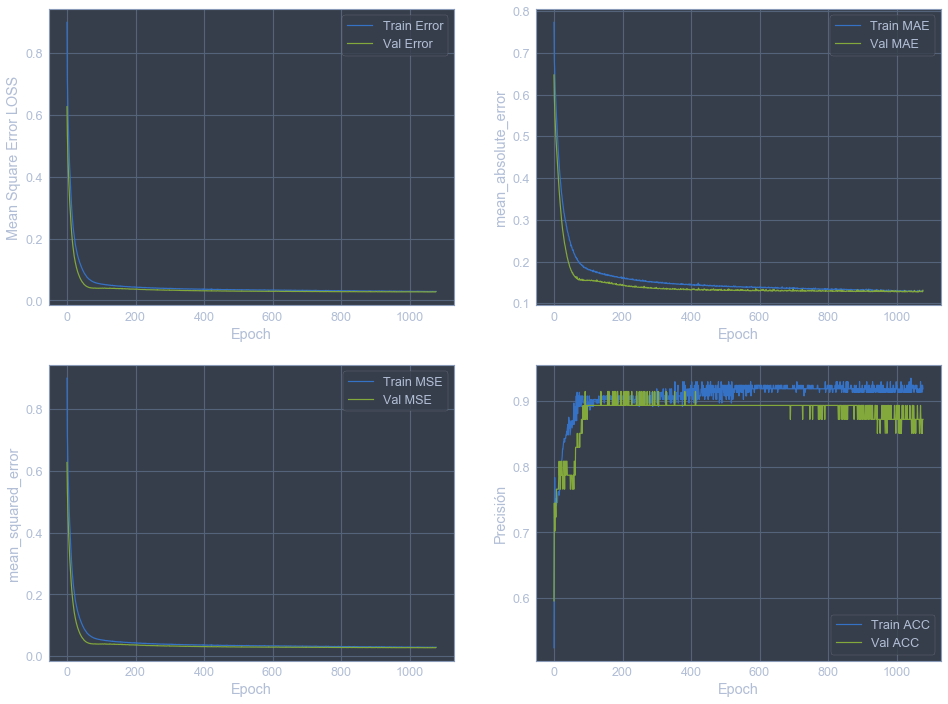

In [26]:
plot_history(history)

Ahora es momento de predecir ya que la red neuronal se encuentra entrenada

In [16]:
y_predic= model.predict(X_test)

Es posible calcular la diferencia entre la prediccion y los datos tomados desde la serie de tiempo

In [17]:
r = y_test - y_predic
ab = abs(r)

Ahora se puede revizar unos datos interesantes

In [18]:
print('Media:', r.mean())
print('Maximo:', ab.max())
print('Minimo:', ab.min())
print('STD:', r.std())

Media: -0.0010469619521917607
Maximo: 0.7502430349795708
Minimo: 0.00019067596719613
STD: 0.1946364167690143


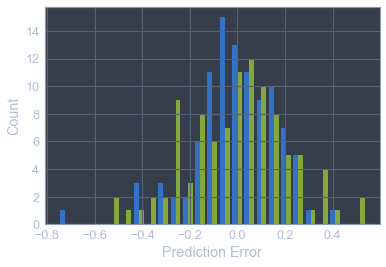

In [19]:
plt.hist(r, bins = 25)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

<h3>Guardar el modelo entrenado </h3>

In [20]:
#model.save('modelo_serie_electrica3.h5')